# Load Data From Drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Libraries


In [1]:
!pip install -U yellowbrick


     |████████████████████████████████| 266kB 3.3MB/s 
  Found existing installation: yellowbrick 0.9.1
    Uninstalling yellowbrick-0.9.1:
      Successfully uninstalled yellowbrick-0.9.1


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

from scipy.sparse import coo_matrix, vstack

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import HashingVectorizer

from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans

from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn import datasets

from sklearn.manifold import TSNE

from yellowbrick.cluster import KElbowVisualizer

from gensim.models import word2vec, Word2Vec
from gensim.models.word2vec import Text8Corpus

from nltk.cluster import KMeansClusterer
import nltk

from bokeh.plotting import ColumnDataSource

from scipy import sparse as sp

import datetime

import os
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import multiprocessing
import itertools
import string
import re
import sys

nltk.download('stopwords')
stopword = nltk.corpus.stopwords.words('english')

color_names = ['red', 'yellow', 'green', 'cyan', 'blue', 'magenta','orange',
               'brown','purple','gold','lime','indigo','tan','khaki',
               'saddlebrown','forestgreen','silver','deeppink',
               'plum','lavender','darkblue']


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


#run before

In [ ]:
def elbow():
  model = KMeans()
  elbow_visualizer = KElbowVisualizer(model, k=(4,20))

  elbow_visualizer.fit(data)
  elbow_visualizer.show()

def plotgraph(dataTroll, trollcluster, dataFigure,figure):  
  fig, ax = plt.subplots()
  label_set = []

  for index, instance in enumerate(dataTroll):
    # print instance, index, labels[index]
    pca_comp_1 = np.asarray(dataTroll[index])[0]
    pca_comp_2 = np.asarray(dataTroll[index])[1] 
    if(trollcluster[index] in label_set):
      ax.scatter(pca_comp_1, pca_comp_2, c=color_names[trollcluster[index]])
    else:
      ax.scatter(pca_comp_1, pca_comp_2, c=color_names[trollcluster[index]],label="Cluster {}".format(trollcluster[index]))
      label_set.append(trollcluster[index])
  #----------------------------#

  for index, instance in enumerate(dataFigure):
    # print instance, index, labels[index]
    pca_comp_1 = np.asarray(dataFigure[index])[0]
    pca_comp_2 = np.asarray(dataFigure[index])[1] 
    ax.scatter(pca_comp_1, pca_comp_2, c='black')
    #ax.annotate(" Trump Tweet {}".format(index),(pca_comp_1, pca_comp_2))

  ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
            fancybox=True, shadow=True, ncol=5)

  plt.title('Clusters of Troll Tweets to {} Tweets from {} to {}'.format(figure,dateMN,dateMX))
  plt.savefig('/content/drive/My Drive/savedfigure/date{}/Cluster{}FigTo{}.png'.format(datebeingrun,datebeingrun,figure))
  #plt.show()

4_16_16


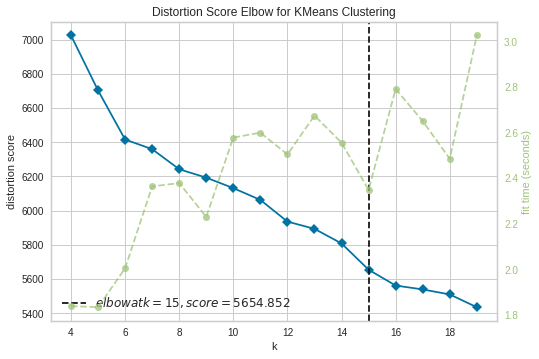

>>> 15
4_21_16


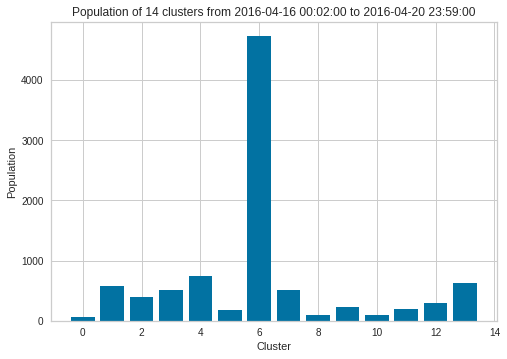

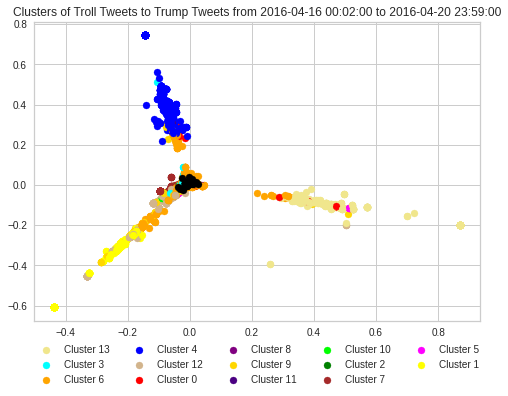

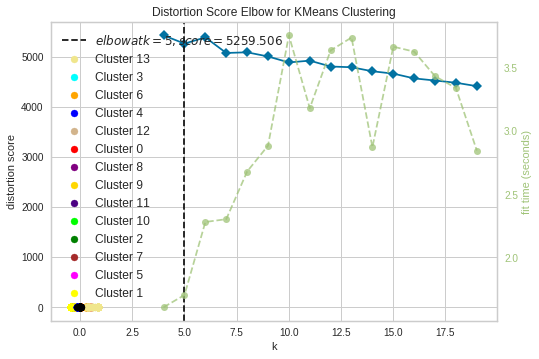

>>> 5
4_26_16


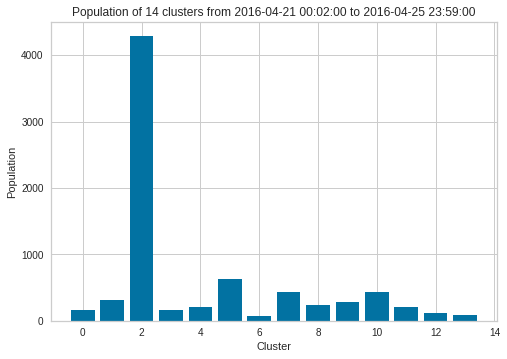

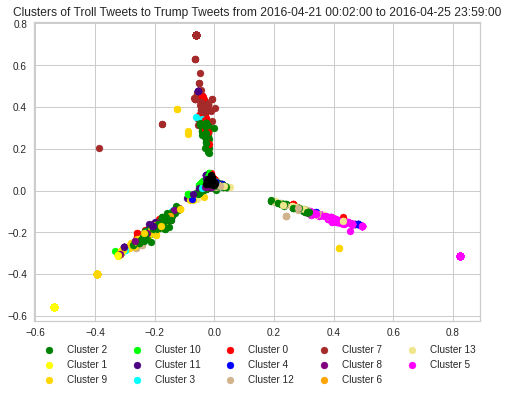

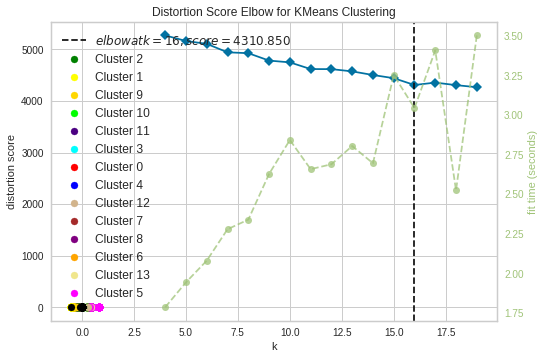

>>> 16
5_1_16


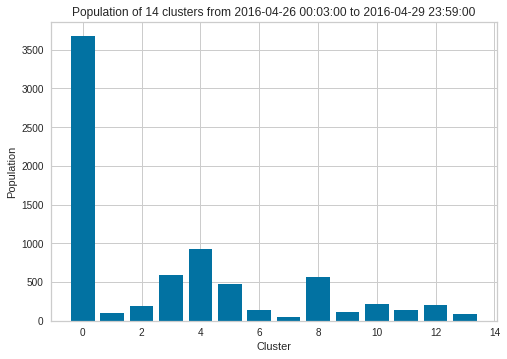

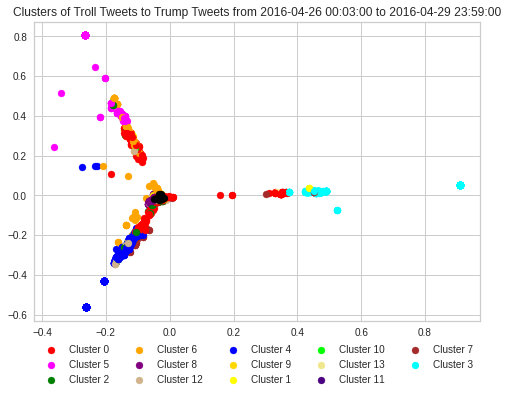

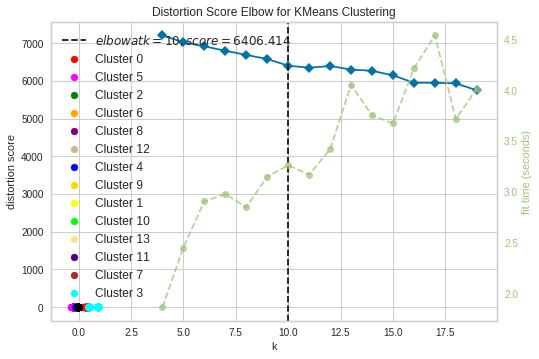

>>> 10
5_6_16


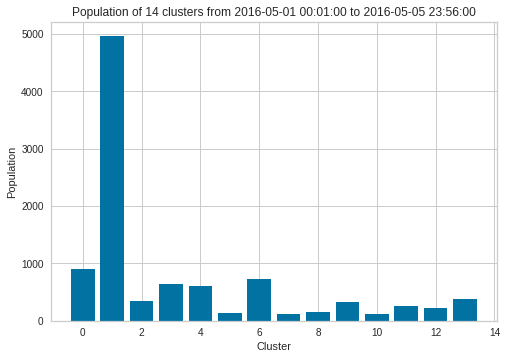

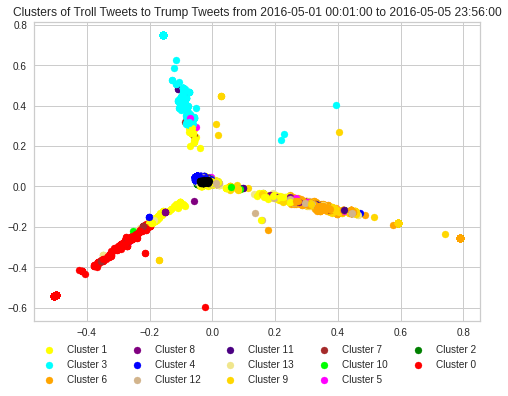

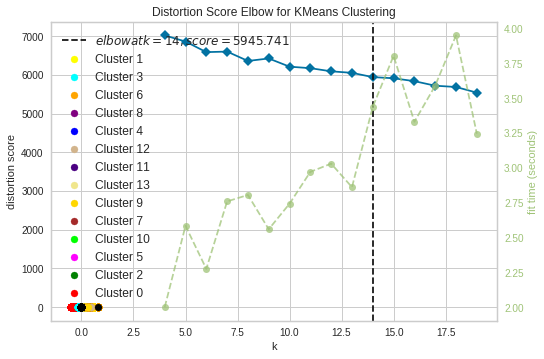

>>> 14
5_11_16


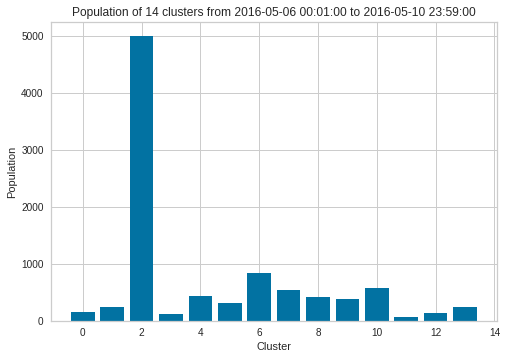

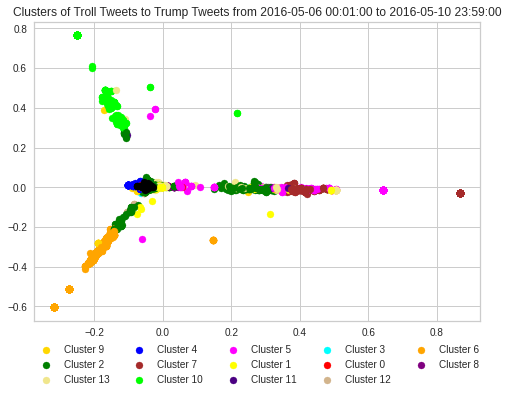

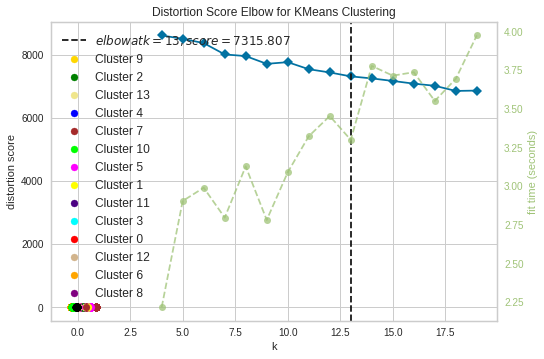

>>> 13
5_16_16


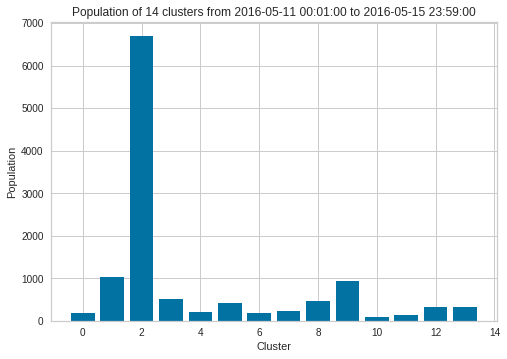

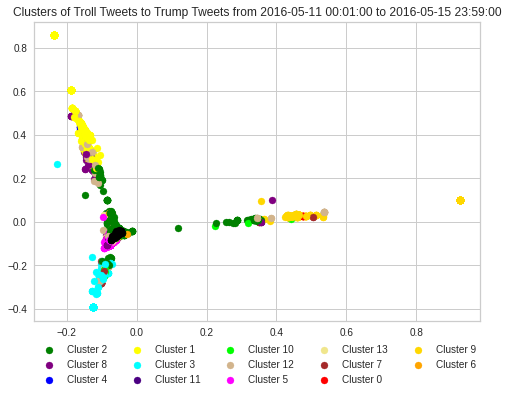

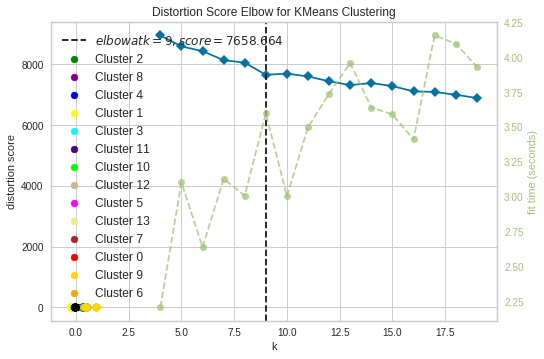

KeyboardInterrupt: ignored

In [ ]:
for month in range(4,9):
  for date in range(1,30,5):
    datebeingrun = '{}_{}_16'.format(month,date)
    isfile = os.path.isfile("/content/drive/My Drive/tweetsbydates/tweet{}.csv".format(datebeingrun))
    if(isfile == False): continue

    print(datebeingrun)
    dataNew = pd.read_csv("/content/drive/My Drive/tweetsbydates/tweet{}.csv".format(datebeingrun))

    dataNew['publish_date'] = pd.to_datetime(dataNew.publish_date)

    dataNew = dataNew.sort_values(by=['publish_date'])

    dateMN = dataNew['publish_date'].min()
    dateMX = dataNew['publish_date'].max()

    #----------------- figure ------------------#

    hillarytweet = pd.read_csv('/content/drive/My Drive/politicalfiguretweets/hillarytweets.csv')
    trumptweet = pd.read_csv('/content/drive/My Drive/politicalfiguretweets/trumptweets.csv')

    hillarytweet['time'] =pd.to_datetime(hillarytweet.time)
    trumptweet['time'] =pd.to_datetime(trumptweet.time)

    datestart = dateMN.to_pydatetime() - datetime.timedelta(2)
    dateend = dateMX.to_pydatetime()

    hillaryrangetweets = hillarytweet.loc[(hillarytweet['time'] > datestart) & (hillarytweet['time'] < dateend),['time','stopword']]
    trumprangetweets = trumptweet.loc[(trumptweet['time'] > datestart) & (trumptweet['time'] < dateend),['time','stopword']]

    #-------------- data concat ---------------#

    trumpstart = len(dataNew['stopword'])
    hillarystart = len(trumprangetweets['stopword']) + trumpstart

    dataAll = pd.concat([dataNew['stopword'], trumprangetweets['stopword'], hillaryrangetweets['stopword']])

    #----------------- tfidf ------------------#

    tfidf = TfidfVectorizer(
        min_df = 5,
        max_df = 0.95,
        max_features = 150,
        stop_words = 'english'
    )
    tfidf.fit(dataAll)
    data = tfidf.transform(dataAll)
    dataMatrix  = tfidf.fit_transform(dataAll)
    dataden = dataMatrix.todense()

    #----------------elbow----------------#

    elbow()
    
    #----------------kmean----------------#

    bestk = int(input(">>> "))

    if(bestk == -1):
      continue

    bestk = 14
    km_model = KMeans(n_clusters=bestk,n_jobs=-1,random_state=91898)
    km_model.fit(data)
    y_kmeans = km_model.fit_predict(data)

    data2D = PCA(n_components=2).fit_transform(dataden)


    #----------------bar graph----------------#
    plt.bar(range(len(set(km_model.labels_))), np.bincount(km_model.labels_))

    plt.title("Population of {} clusters from {} to {}".format(bestk,dateMN,dateMX))
    plt.ylabel('Population')
    plt.xlabel('Cluster')
    plt.savefig('/content/drive/My Drive/savedfigure/date{}/Cluster{}PopulationofClusters.png'.format(datebeingrun,datebeingrun))

    #----------------scatter----------------#

    plotgraph(data2D[:trumpstart], y_kmeans[:trumpstart], data2D[trumpstart:hillarystart],'Trump')
    plotgraph(data2D[:trumpstart], y_kmeans[:trumpstart], data2D[hillarystart:],'Hillary')